![](DaThabor_Logo.png)

----------

# MENTORING SESSIONS

<br>

May, 2020

<br>

## Simple Linear Regression

<br>

----------

The first step while using Python is to make sure that all packages are loaded into the environment. `pandas` and `numpy` are the most commonly used. The other packages you will come by along the way, e.g. when plotting data or doing machine learning model engineering.

<br>

To import the packages either select the `cell block` below and hit SHIFT+ENTER, or go to the menu --> Cell --> Run Cells (this will run all cells in the notebook).

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

then of course we will be needing data to work with, so we load the data into the environment as well. And we look at the first 5 observations (rows) in the data set, to get a quick idea of how the data looks like

In [3]:
data = pd.read_csv("Advertising.csv")

In [4]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


As we can see we have 4 columns in the data set: `TV`,`Radio`,`Newspaper` and `Sales`. All of them have numerical values. 

<br>

For this notebook, we want to look at predicting the Sales amount, based on the budget set for either `TV`,`Radio` Or `Newspaper`. Let's plot all of them separately to get an idea of the data.

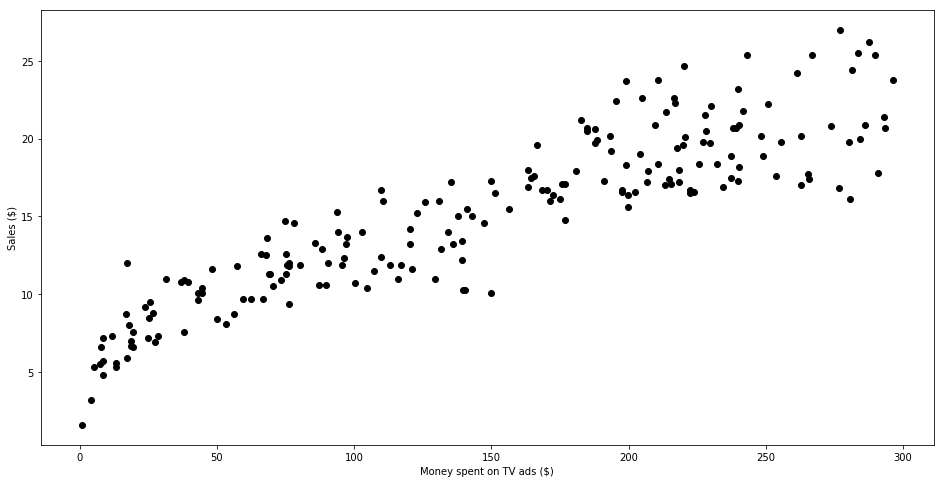

In [6]:
plt.figure(figsize=(16, 8))
plt.scatter(
    data['TV'],
    data['Sales'],
    c='black'
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

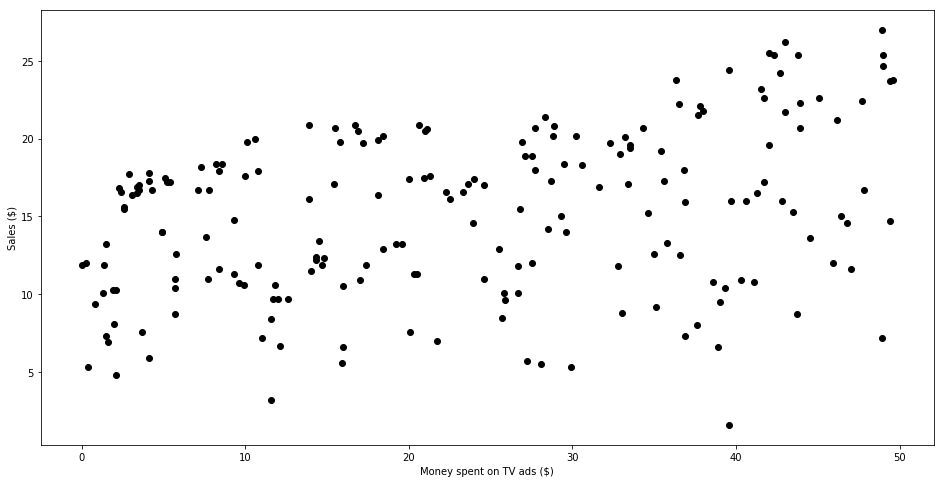

In [12]:
plt.figure(figsize=(16, 8))
plt.scatter(
    data['Radio'],
    data['Sales'],
    c='black'
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

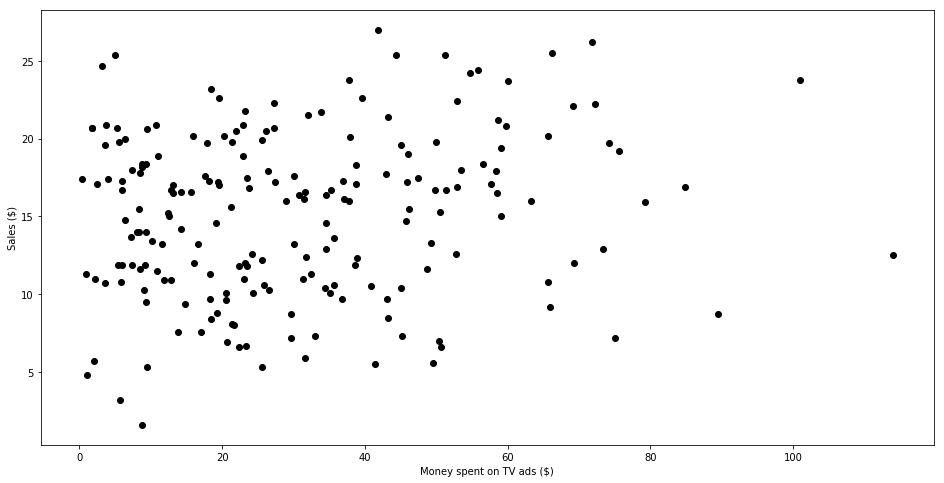

In [13]:
plt.figure(figsize=(16, 8))
plt.scatter(
    data['Newspaper'],
    data['Sales'],
    c='black'
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

From the above plots we can already see that `Radio` and `Newspaper` are more scattered and therefore might not be useful to run a linear regression. However, looking at the `TV` variable, we do see more of a linear model. Let's run a correlation plot on the data to see if our assumption is right.

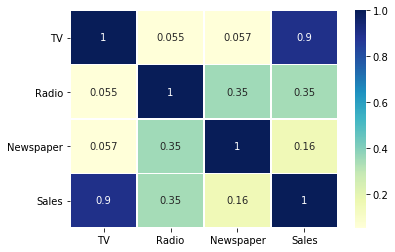

In [17]:
sns.heatmap(data.corr(), 
            cmap="YlGnBu", 
            annot = True, 
            linewidths=.5)
plt.show()

So this confirms that the corrrelation between `TV` and `Sales` is indeed the highest with a value of 0.9. So for our linear regression model, we will be using the `TV` variable to predict the `Sales` amount.

<br>

The following code is used to calculate the values for the linear regression, which are following this mathematical formula for a straight line:

$y = \beta_{0} + \beta_{1}x + \epsilon$

<br>

- ,where $\beta_{0}$ = y-intercept;
- and $\beta_{1}$ = slope of the line;
- and $\epsilon$ is a random error margin

In [24]:
X = data['TV'].values.reshape(-1,1)
y = data['Sales'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)
print("The linear model is: Y = {:.5} + {:.5}X + \u03B5".format(reg.intercept_[0], 
                                                                reg.coef_[0][0]))

The linear model is: Y = 6.9748 + 0.055465X + ε


Getting the values for the slope and intercept for `TV` and `Sales`, we can now plot the straight line (which is the best-fit) onto the scatter plot

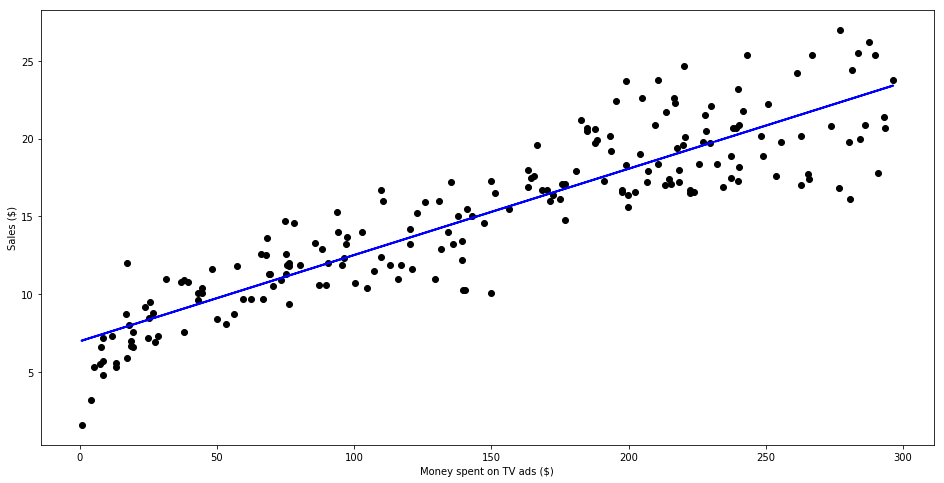

In [25]:
predictions = reg.predict(X)
plt.figure(figsize=(16, 8))
plt.scatter(
    data['TV'],
    data['Sales'],
    c='black'
)
plt.plot(
    data['TV'],
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

From this we now know that we can predict any 'Money spent on TV ads', by going to the specific value on the x-axis and then going up to reach the blue line. The value of the blue line will be our predicted outcome value. If you try this out for several values, you will see that the 'blue line' value is not exactly the 'real-value'. We are trying to find the prediction that "scores" the best. Therefore we try to find the 'blue-line' that minimizes all the predicted values for all data points, so that in general the fit has the higest accuracy.

<br>

Let's have a look at the summary of this linear regression model and see how that turns out

In [26]:
X = data['TV']
y = data['Sales']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Sat, 02 May 2020   Prob (F-statistic):           7.93e-74
Time:                        09:52:25   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9748      0.323     21.624      0.0

From this summary we can find a few important values to check:

1. $R^2$, or R-squared

The accuracy for the model, which in this case is 0.812 (or 81.2%). This means that we can explain about 81% of the increase in TV budget in relation to the increase of `Sales`.

2. Adjusted R-square

This is even a better method to check the accuracy as it uses a bit more complexitity, and in general result in a lower accuracy. In this case we get an adjusted r-square value of 0.811 (or 81.1%).

3. P-Value

The p-value is a measure to check on our hypothesis. In general we reject the hypothesis if the p-value is below a certain threshold, normally < 0.05. A p-value below this threshold is normally seen as statistical significant, hence can be used to make assumptions about the regression model and/or reject or fail to reject our hypothesis.



![](DaThabor_Logo.png)

----------

# ASSIGNMENT

<br>

May, 2020

<br>

## Housing Prices

<br>

----------

Get the Housing Prices data set as below and create your own simple linear regression model based on the `house price` and any variable that has a correlation with the housing price.

In [30]:
from sklearn.datasets import load_boston
boston = load_boston()